# Analysis of Life Expectancy and GDP

This project is to analyse dataset that consists of a information on the life expectancy and GDP from 2000 to 2015 for various countries. The purpose of this project is to analyse and identify trends between these variables. 

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided from the Codecademy course 'Data Scientist: Analytics'. We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. Has GDP and life expectancy increased throughout the years in these countries?
2. Does GDP have an effect on the life expectancy of a country?
3. What is the average life expectancy in these countries?
4. Which country has the largest growth in GDP through the years?

### Import Libraries

In [223]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

life_data = pd.read_csv('all_data.csv')

### Load and Inspect Data

In [224]:
life_data.info()
life_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The dataset contains 96 rows and 4 columns containing information on different countries. Fortunately, none of the columns seem to have any null values. Here's a quick summary of the columns:

- **Country**: Name of Country
- **Year**: Year of Data
- **Life expectancy at birth**: The average life expectancy since birth in years
- **GDP**: Gross Domestic Product of country for the year

In [225]:
life_data.describe(include = 'all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


The table provides details on the dataset. There are 6 unique countries namely Chile, China, Germany, Mexico, United States of America, and Zimbabwe. The average life expectancy and GDP through the years among these 6 nations is 73 years and 3.8 trillions respectively. 

### Data Cleaning and Preparation

Firstly, we are going to rename the life expectancy column to a 'LEAB' for easier referencing.

In [226]:
life_data.rename(columns = {'Life expectancy at birth (years)':'LEAB'}, inplace = True)

In [227]:
life_data.head()

,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [228]:
def clean_df_text(df):
    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = df[column].round(2)
            
    return df

## Data Question 1: Has GDP and life expectancy increased throughout the years in these countries?

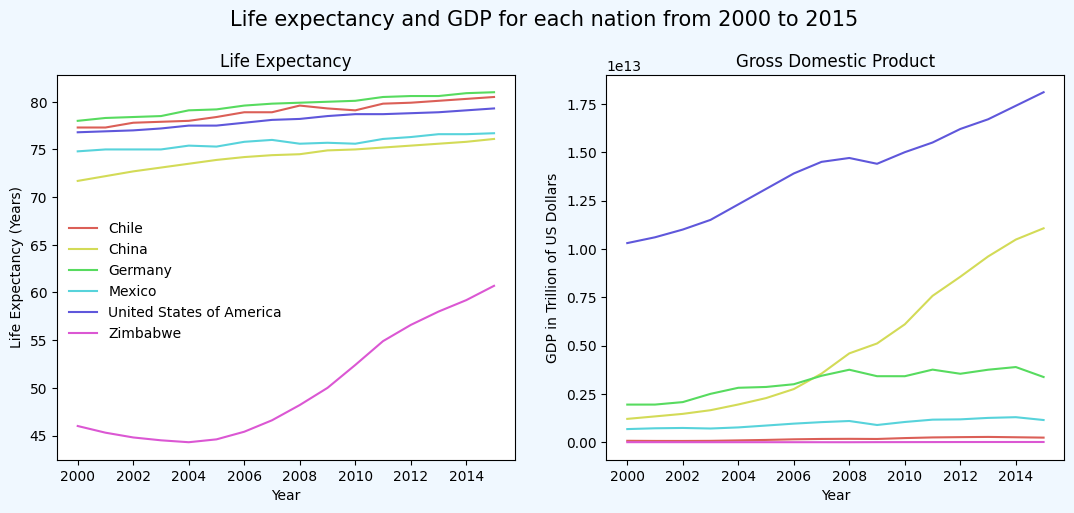

In [229]:
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 5))
plt.suptitle("Life expectancy and GDP for each nation from 2000 to 2015", fontsize = 15, y = 1.01)
plt.subplots_adjust(wspace=0.2,hspace=0.9)

plt.subplot(1,2,1)
sns.lineplot(data = life_data, x = 'Year', y = 'LEAB', hue = 'Country', palette = sns.color_palette("hls", 6))
plt.ylabel('Life Expectancy (Years)')
plt.legend(bbox_to_anchor=(0, 0.65), loc='upper left', fontsize='10', frameon = False)
plt.title('Life Expectancy')

plt.subplot(1,2,2)
sns.lineplot(data = life_data, x = 'Year', y = 'GDP', hue = 'Country', palette= sns.color_palette("hls", 6))
plt.ylabel('GDP in Trillion of US Dollars')
plt.title('Gross Domestic Product')
plt.legend([],[], frameon=False)
plt.show()

The life expectancy for all these nations except Zimbabwe seem to increase gradually through the years. For Zimbabwe, the life expectancy decrease from approximately 46 to 45 from the year 2000 to 2004. It increases to around 60 years in 2014. The other nations have life expectancies above 70 years old. The GDP of China increase drastically thoughout the years from approximately 0.2 to 1.1 trillion dollars. The U.S also has a substantial increase in GDP from 1 trillion to 1.8 trillion dollars. Germany's GDP seem to increase only slightly but Mexico, Chile and Zimbabwe's GDP has very little change.

## Data Question : Does GDP have an effect on the life expectancy of a country?

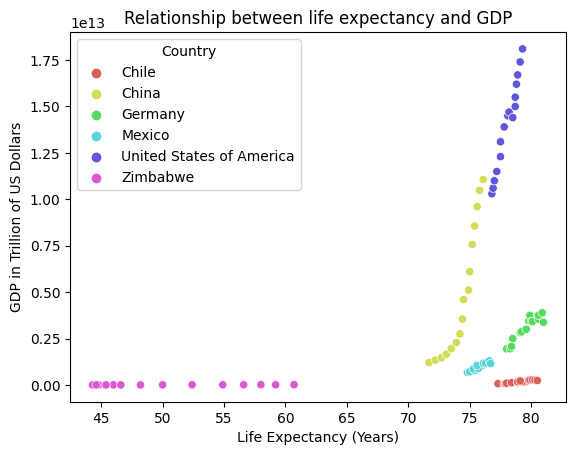

In [230]:
sns.scatterplot(data = life_data, x = 'LEAB', y = 'GDP', hue = 'Country', palette = sns.color_palette("hls", 6))
plt.title('Relationship between life expectancy and GDP')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('GDP in Trillion of US Dollars')
plt.show()

The United States and China have a drastic increase in GDP whereas Mexico and Germany's GDP only increase slightly as life expectancy increases. Zimbabwe and Chile's GDP does not seem to increase at all. However, it is difficult to compare these nations in respect to China and the U.S's GDP size. 

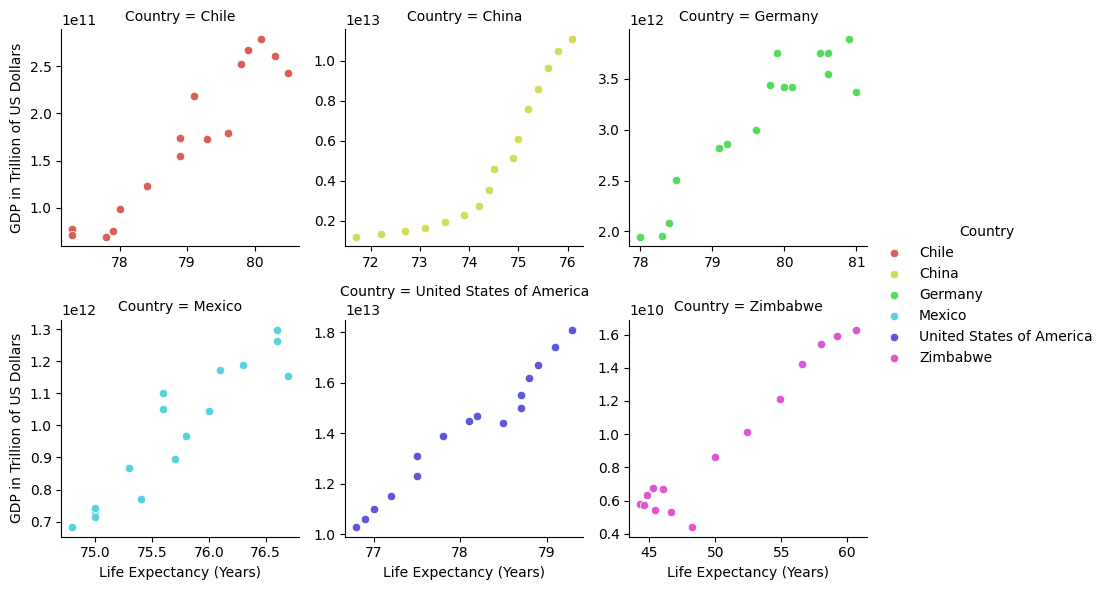

In [231]:
g = sns.FacetGrid(life_data, col="Country", hue = 'Country', col_wrap= 3, sharey = False, sharex = False, palette = sns.color_palette("hls", 6))
g = (g.map(sns.scatterplot,"LEAB", "GDP").add_legend().set_axis_labels('Life Expectancy (Years)', 'GDP in Trillion of US Dollars'))
plt.show()

The graphs above display the relationship between life expectancy and GDP in relation to each country. This is a much better visualisation to analyse. It seems that all nations have a positive correlation between GDP and life expectancy. 

In [232]:
countries = life_data.Country.unique()

for country in countries:
    df = life_data[life_data.Country == country]
    var,p = pearsonr(df.LEAB, df.GDP)
    print('The Pearson Correlation Coefficient between life expectancy and GDP in {nation} is {pearson}.'.format(pearson = round(var,2), nation = country))

The Pearson Correlation Coefficient between life expectancy and GDP in Chile is 0.95.
The Pearson Correlation Coefficient between life expectancy and GDP in China is 0.91.
The Pearson Correlation Coefficient between life expectancy and GDP in Germany is 0.93.
The Pearson Correlation Coefficient between life expectancy and GDP in Mexico is 0.93.
The Pearson Correlation Coefficient between life expectancy and GDP in United States of America is 0.98.
The Pearson Correlation Coefficient between life expectancy and GDP in Zimbabwe is 0.97.


According to Pearson's correlation coefficients, all of these nations have a strong positive correlation between life expectancy and GDP. The United States has the highest correlation coefficient of 0.98. 

## Data Question 3: What is the average life expectancy in these countries?

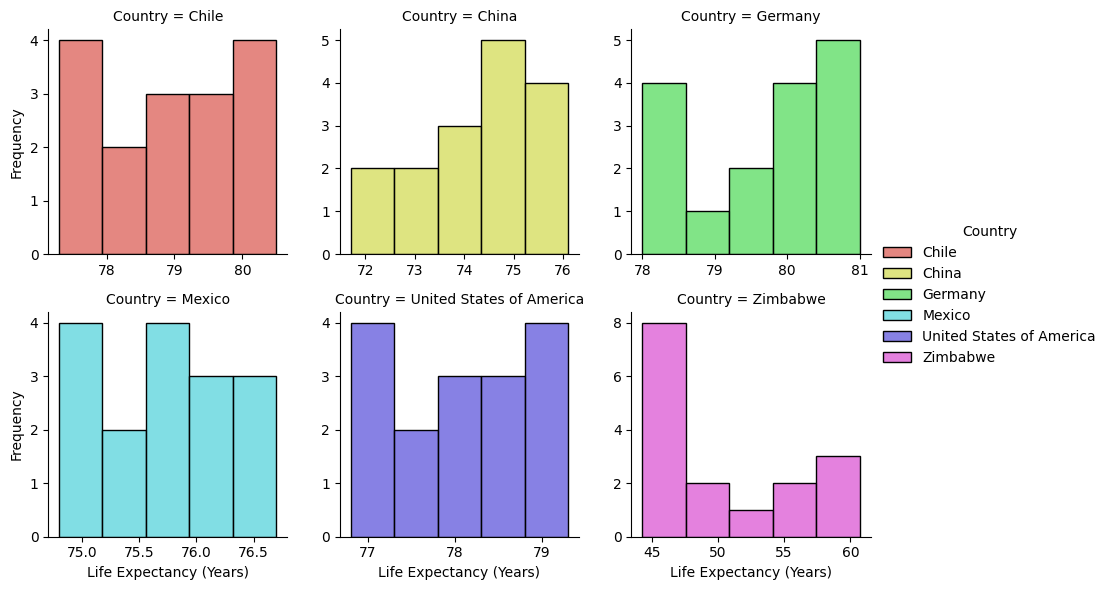

In [233]:
g = sns.FacetGrid(life_data, col="Country", hue = 'Country', col_wrap= 3, sharey = False, sharex = False, palette = sns.color_palette("hls", 6))
g = (g.map(sns.histplot,'LEAB').add_legend().set_axis_labels('Life Expectancy (Years)', 'Frequency'))
plt.show()

Chile and Germany have the highest life expectancy of around 81 years old. China has the largest distribution which signifies that it has the largest increase through the years. Zimbabwe's life expectancy is significantly lower than the rest with a minimum of 45 years old. 

In [234]:
avg_life = life_data.groupby('Country').LEAB.mean().sort_values(ascending = False).reset_index()            
avg_life = clean_df_text(avg_life)
avg_life

,Country,LEAB
0,Germany,79.66
1,Chile,78.94
2,United States of America,78.06
3,Mexico,75.72
4,China,74.26
5,Zimbabwe,50.09


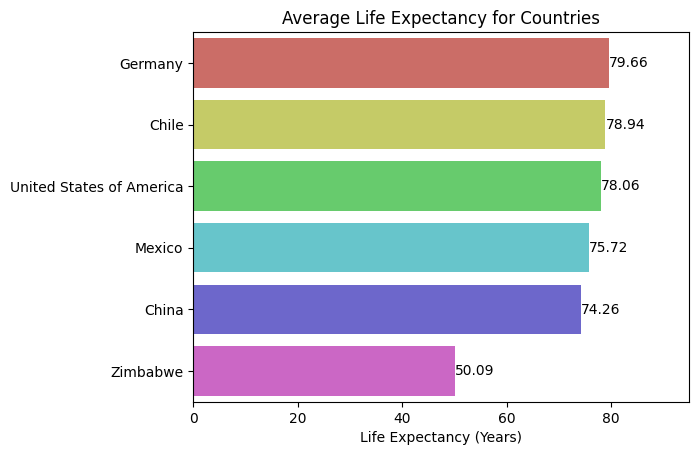

In [235]:
gr = sns.barplot(data = avg_life, x = 'LEAB', y = 'Country', ci = None, palette = sns.color_palette("hls", 6))
gr.bar_label(gr.containers[0])
plt.title('Average Life Expectancy for Countries')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('')
plt.xlim(0, 95)
plt.show()

Unsurprisingly, the average life expectancy in Germany is the highest with 79.7 years old, followed by Chile and the United States with 78.9 and 78.06 years old respectively. This could mean that these countries already had a steady GDP before the 2000s. Zimbabwe has the lowest average life expectancy with only 50 years old which could be due to its low GDP in the early years.

## Conclusions 

From our analysis, it can be concluded that both life expectancy and GDP for each of these nations increase over time. However, countries such as China and the U.S have a much higher growth compared to the other countries. Zimbabwe struggled throughout the early 2000s but gradually increase in GDP and life expectancy after that. Chile, Mexico and Germany's growth seem to be slow but gradual throughout the years. It was also found that there is a strong correlation between life expectancy and GDP within these countries. Lastly, the average life expectancy among the countries were also found and it was discovered that Germany has the highest life expectancy with an average of 80 years old, followed by Chile and the United States. 